# Data Analysis & Visualization<br/>
## WeRateDogs Project

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. As it might be obvious, because "they're good dogs." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to be used in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

Tweepy package and tweeter API was used to collect the current status (retweet and favorite status) for the provided tweet IDs. At this stage, it is important to acknowledge that tweeter enabled me a developer account and provided me with needed keys to use tweeter APIs. A software was used to predict the dog breed in the tweets. The predictions were supplied in a separate data file.

In the previous data wrangling efforts, data were gathered, assessed, cleaned and finally combined in one master document to be used in data analysis and visualization.

In [8]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataframe
tweeter_df = pd.read_csv('twitter_archive_master.csv')

In [3]:
tweeter_df.head()

,Unnamed: 0,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_class,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,favorite_count,retweet_count
0,0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


 ## Most Common Dog Category

In [4]:
tweeter_df.dog_class.value_counts()

pupper     251
doggo       80
puppo       29
floofer     10
Name: dog_class, dtype: int64

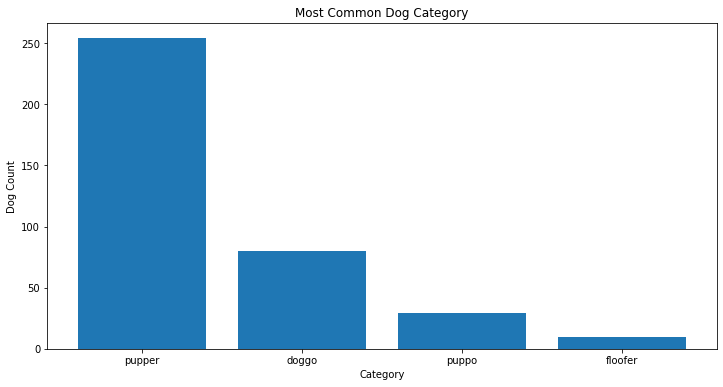

In [5]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [254, 80, 29, 10]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

Similarly, I check the distribution of dog stages. It shows that ‘pupper’ is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog stages, thus the distribution may not reflect the truth.

## The Distribution of Source

Twitter for iphone     2121
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                10
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

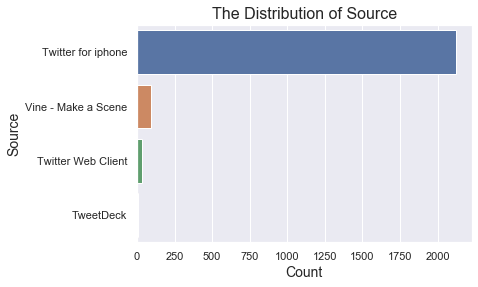

In [10]:
sorted_source = tweeter_df['source'].value_counts().index
print(tweeter_df['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = tweeter_df , y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

## Retweet_count and favorite_count

Text(0.5, 1.0, ' the relationship between Retweet and favorite')

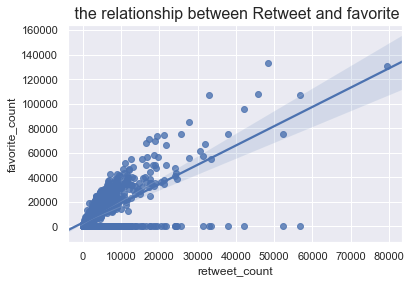

In [11]:
sns.regplot(x="retweet_count", y="favorite_count", data=tweeter_df)
plt.title(' the relationship between Retweet and favorite',fontsize=16)

A reasonable hypothesis is that most popular tweets usually get a large number of retweets and favorite counts. I test the correlation between ‘retweet_count’ and ‘favorite_count’. the plot showing a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. That confirms this hypothesis.

In [12]:
tweeter_df.rating_numerator.describe()

count    2254.000000
mean       10.700089
std         2.126207
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

In [13]:
tweeter_df.first_prediction.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [14]:
tweeter_df.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [15]:
tweeter_df.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

## insight <br/>
The most popular dog type is a "pupper"<br/>
The most popular dog, based on image predictions, is a Golden Retriever<br/>
The median and mean ratings out of ten are 11 and 12.7 respectively<br/>
The median and mean retweet count is 1337 and 2837 respectively <br/>
The median and mean favorite count is 3744 and 8490 respectively <br/>